In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

-------------


#### Reading in the clean train data

In [84]:
df_train = pd.read_csv("../datasets/train_clean.csv")

----
## Grouping Features by Type  
<pre>
Numerical  :  (1) Continuous
              (2) Discrete
Categorical:  (3) Nominal
              (4) Ordinal
</pre>

In [3]:
df_numerical = df_train[[ 'Id','Lot Frontage', 'Lot Area','Year Built','Year Remod/Add','Mas Vnr Area', 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',
                         'Total Bsmt SF','1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath', 'Full Bath',
                         'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Yr Blt','Garage Cars', 'Garage Area',
                         'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area','Misc Val','Mo Sold', 
                         'Yr Sold', 'SalePrice'
                        ]]
df_numerical.shape

(2050, 35)

In [4]:
df_categorical = df_train[['MS SubClass','MS Zoning', 'Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config','Land Slope','Neighborhood',
                           'Condition 1','Condition 2', 'Bldg Type','House Style','Overall Qual','Overall Cond', 'Roof Style', 'Roof Matl','Exterior 1st',
                           'Exterior 2nd', 'Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                           'Heating','Heating QC','Central Air',  'Electrical', 'Kitchen Qual','Functional','Fireplace Qu','Garage Type','Garage Finish',
                           'Garage Qual', 'Garage Cond','Paved Drive', 'Pool QC', 'Fence', 'Misc Feature','Sale Type'
                          ]]
df_categorical.shape

(2050, 45)

In [5]:
df_continuous = df_train[['Lot Frontage', 'Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF', 
                          '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area','Garage Area','Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
                          '3Ssn Porch', 'Screen Porch', 'Pool Area','Misc Val','SalePrice'
                         ]]
df_continuous.shape

(2050, 20)

In [12]:
df_discrete = df_train[[ 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
                        'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces','Garage Yr Blt','Garage Cars', 'Mo Sold', 'Yr Sold'
                       ]]
df_discrete.shape

(2050, 14)

In [7]:
df_nominal = df_train[['MS SubClass', 'MS Zoning', 'Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2', 'Bldg Type',
                       'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd', 'Mas Vnr Type','Foundation','Heating','Central Air', 'Garage Type',
                       'Misc Feature','Sale Type'
                      ]]
df_nominal.shape

(2050, 22)

In [8]:
df_ordinal = df_train[[ 'Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond', 'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond',
                       'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC', 'Electrical', 'Kitchen Qual','Functional','Fireplace Qu',
                       'Garage Finish','Garage Qual','Garage Cond','Paved Drive', 'Pool QC', 'Fence'
                      ]]
df_ordinal.shape

(2050, 23)

------------

## Looking for outliers

### Graphing the Numerical Data

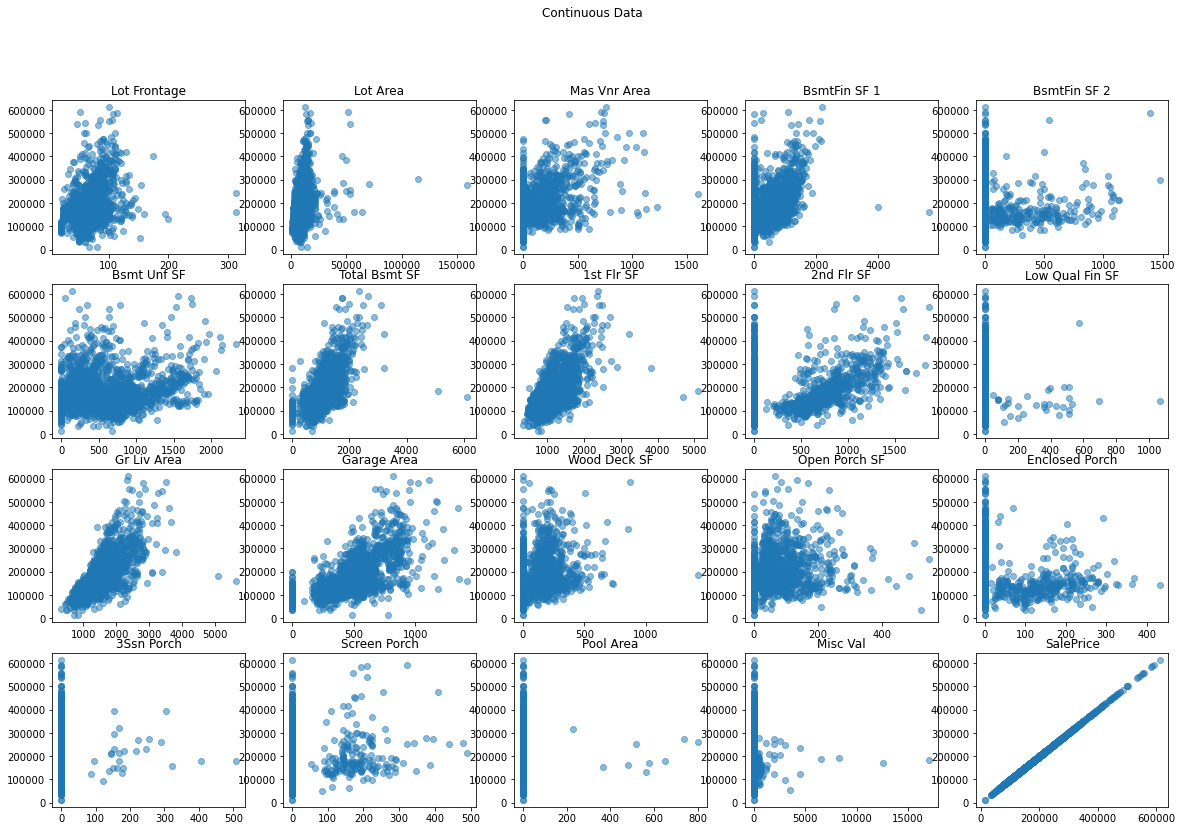

In [86]:
fig, ax = plt.subplots(nrows = 4, ncols = 5 , figsize = (20, 13))
counter = 0
for col in df_continuous.columns:
    i, j = counter//5, counter%5
    ax[i,j].scatter(x=df_continuous[col], y=df_train["SalePrice"], alpha = .5)
    ax[i,j].set_title(col)
    counter +=1
fig.suptitle("Continuous Data");    

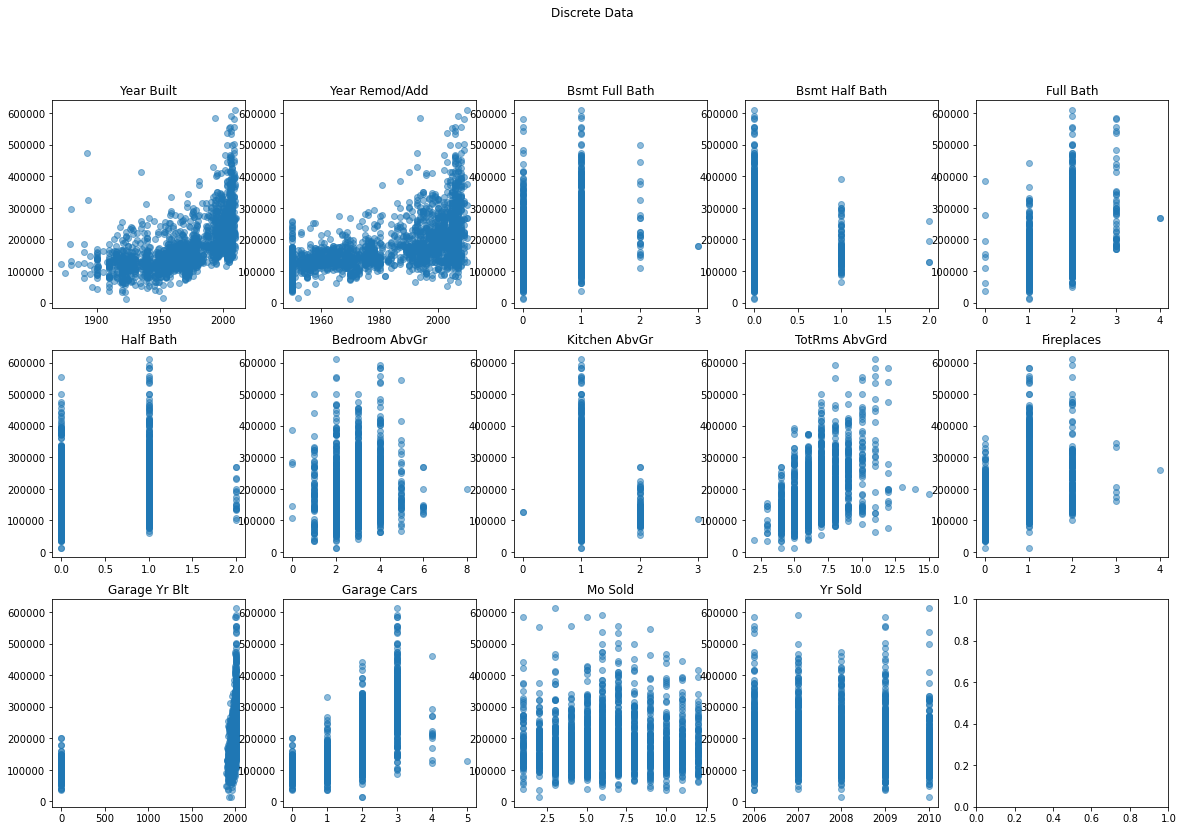

In [85]:
fig, ax = plt.subplots(nrows = 3, ncols = 5 , figsize = (20, 13))
counter = 0
for col in df_discrete.columns:
    i, j = counter//5, counter%5
    ax[i,j].scatter(x=df_discrete[col], y=df_train["SalePrice"], alpha = .5)
    ax[i,j].set_title(col)
    counter +=1
fig.suptitle("Discrete Data");    

#### Dropping rows with outliers

In [20]:
df_train = df_train[df_train['Gr Liv Area'] <= 4000] #Removes 2 rows
df_train = df_train[df_train['Wood Deck SF'] <= 1000] #Removes 1 row
df_train = df_train[df_train['Mas Vnr Area'] <= 1400] #Removes 1 row
df_train = df_train.drop(df_train[(df_train['Overall Qual'] >= 9)&(df_train['SalePrice'] < 200000) ].index) #Removes 1 row
df_train = df_train.drop(df_train[(df_train['Overall Qual'] <= 6)&(df_train['SalePrice'] > 400000) ].index) #Removes 1 row

--------
### Looking into the relationships between features

### Heatmap of Correlations 

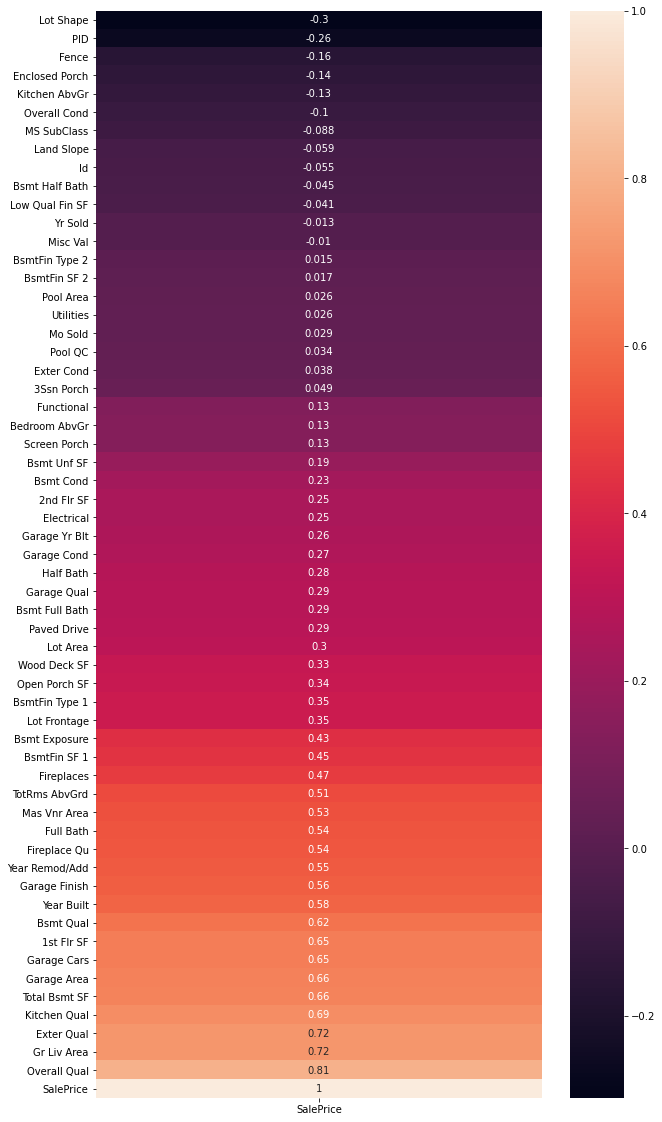

In [21]:
plt.figure(figsize=(10, 20))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True);

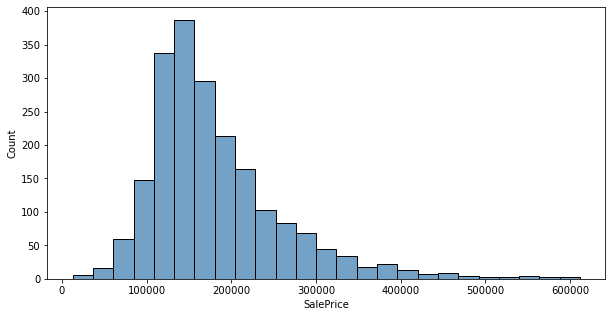

In [63]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice"], bins=25, color='steelblue');

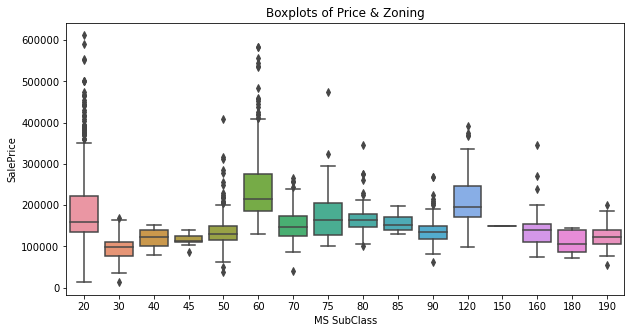

In [54]:
plt.figure(figsize =(10,5))
sns.boxplot(x='MS SubClass', y='SalePrice', data=df_train)
plt.title('Boxplots of Price & Zoning');

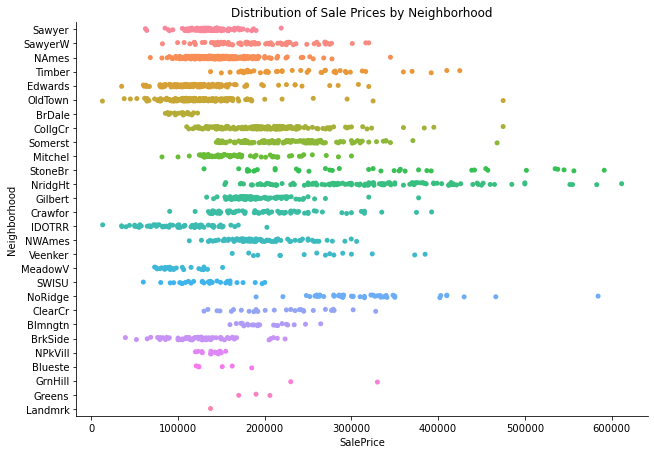

In [78]:
sns.catplot(data=df_train, x='SalePrice', y='Neighborhood', height = 6, aspect = 1.5)
plt.title('Distribution of Sale Prices by Neighborhood');

### Scatterplot of Lot Frontage and Sale Price, grouped by Neighborhoods

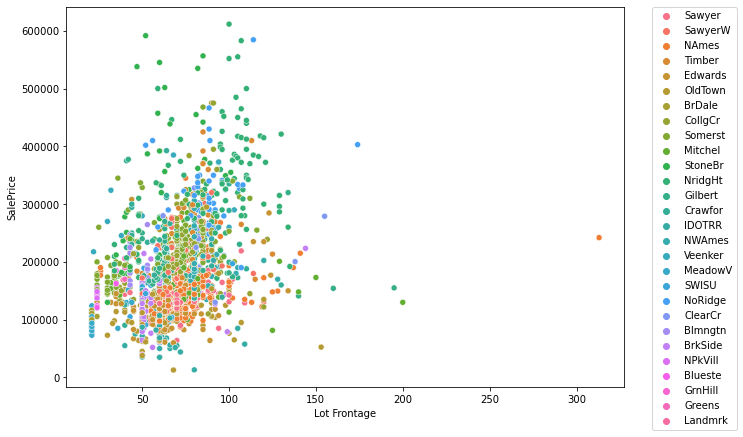

In [40]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df_train, x="Lot Frontage", y="SalePrice", hue = "Neighborhood")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Scatterplot of Garage Year Built and Sale Price, grouped by Neighborhoods

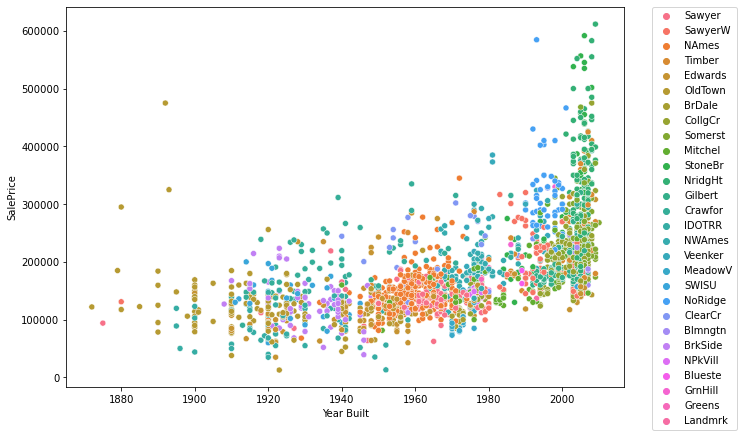

In [58]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df_train, x="Year Built", y="SalePrice", hue = "Neighborhood")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Scatterplot of Garage Year Built and Sale Price, grouped by Garage Type

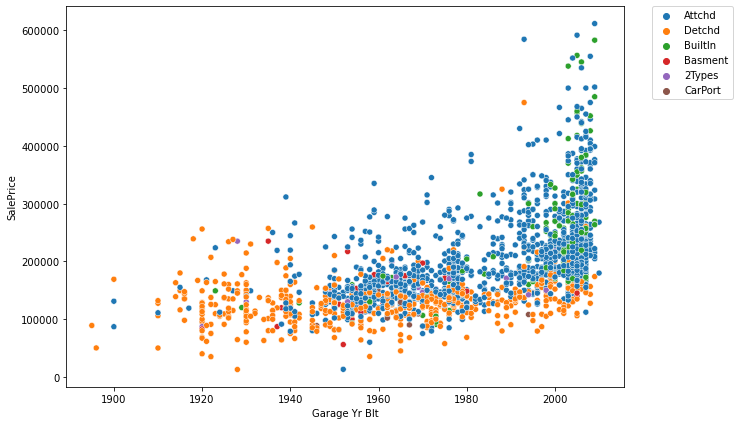

In [80]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df_train[df_train["Garage Yr Blt"]>0], x="Garage Yr Blt", y="SalePrice", hue = "Garage Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);